# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import pandas

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'dataset/train.p'
validation_file= 'dataset/valid.p'
testing_file = 'dataset/test.p'
signnames_file = 'signnames.csv'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
signnames = pandas.read_csv(signnames_file)
signnames = signnames.set_index('ClassId')['SignName'].to_dict()

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)
n_valid = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(signnames)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

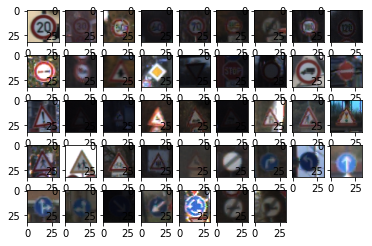

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

sample = {}
for index in range(n_train):
    label = y_train[index]
    if label not in sample:
        sample[label] = index

for label, index in sample.items():
    plt.subplot(5,9,label+1)
    plt.imshow(X_train[index])

In [4]:
### print count of signs
def count(labels):
    result = {}
    for label in labels:
        result[label] = (result[label]+1) if label in result else 1
    return result

train_count = count(y_train)
valid_count = count(y_valid)
test_count = count(y_test)

print(pandas.DataFrame([train_count, valid_count, test_count, signnames], index=["train", "valid", "test", "desc"]).T)

   train valid test                                               desc
0    180    30   60                               Speed limit (20km/h)
1   1980   240  720                               Speed limit (30km/h)
2   2010   240  750                               Speed limit (50km/h)
3   1260   150  450                               Speed limit (60km/h)
4   1770   210  660                               Speed limit (70km/h)
5   1650   210  630                               Speed limit (80km/h)
6    360    60  150                        End of speed limit (80km/h)
7   1290   150  450                              Speed limit (100km/h)
8   1260   150  450                              Speed limit (120km/h)
9   1320   150  480                                         No passing
10  1800   210  660       No passing for vehicles over 3.5 metric tons
11  1170   150  420              Right-of-way at the next intersection
12  1890   210  690                                      Priority road
13  19

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import cv2

def preprocess(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray = gray[:,:,None]
    min_val = gray.min()
    max_val = gray.max()
    return (gray - min_val) / (max_val - min_val)

X_train_norm = [preprocess(img) for img in X_train]
X_valid_norm = [preprocess(img) for img in X_valid]
X_test_norm = [preprocess(img) for img in X_test]

(32, 32, 1)


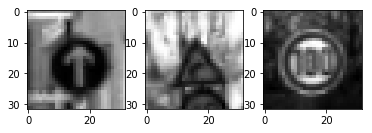

In [6]:
print(X_train_norm[0].shape)

plt.subplot(131); plt.imshow(X_train_norm[random.randint(0, n_train)].squeeze(), cmap='gray')
plt.subplot(132); plt.imshow(X_valid_norm[random.randint(0, n_valid)].squeeze(), cmap='gray')
plt.subplot(133); plt.imshow(X_test_norm[random.randint(0, n_test)].squeeze(), cmap='gray')

### Model Architecture

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
sigma = .05

def get_model(features, keep_prob, num_classes):
    # layer 1 convo in 32x32x1 out 28x28x12
    l1c_w = tf.Variable(tf.truncated_normal(shape=(5,5,1,24), stddev=sigma))
    l1c_b = tf.Variable(tf.zeros(shape=(24,)))
    l1c = tf.nn.bias_add(tf.nn.conv2d(input=features, filter=l1c_w, strides=(1,1,1,1), padding='VALID'), l1c_b)
    l1a = tf.nn.relu(features=l1c)
    
    # layer 1 pool out 14x14x12
    l1p = tf.nn.max_pool(value=l1a, ksize=(1,2,2,1), strides=(1,2,2,1), padding='VALID')
    
    # layer 2 convo out 10x10x32
    l2c_w = tf.Variable(tf.truncated_normal(shape=(5,5,24,36), stddev=sigma))
    l2c_b = tf.Variable(tf.zeros(shape=(36,)))
    l2c = tf.nn.bias_add(tf.nn.conv2d(input=l1p, filter=l2c_w, strides=(1,1,1,1), padding='VALID'), l2c_b)
    l2a = tf.nn.relu(features=l2c)
    
    # layer 2 pool out 5x5x32
    #l2p = tf.nn.max_pool(value=l2a, ksize=(1,2,2,1), strides=(1,2,2,1), padding='VALID')
    
    # layer 2.5 convo out 6x6x48
    l25c_w = tf.Variable(tf.truncated_normal(shape=(5,5,36,48), stddev=sigma))
    l25c_b = tf.Variable(tf.zeros(shape=(48,)))
    l25c = tf.nn.bias_add(tf.nn.conv2d(input=l2a, filter=l25c_w, strides=(1,1,1,1), padding='VALID'), l25c_b)
    l25a = tf.nn.relu(features=l25c)
    
    # layer 2.5 pool out 5x5x48
    #l25p = tf.nn.max_pool(value=l25a, ksize=(1,2,2,1), strides=(1,2,2,1), padding='VALID')
    
    # flatten
    f = tf.contrib.layers.flatten(l25a)
    
    # layer 3 out 120
    l3_w = tf.Variable(tf.truncated_normal(shape=(6*6*48,120), stddev=sigma))
    l3_b = tf.Variable(tf.zeros(shape=(120,)))
    l3 = tf.nn.bias_add(tf.matmul(f, l3_w), l3_b)
    l3a = tf.nn.relu(features=l3)
    l3a = tf.nn.dropout(l3a, keep_prob)
    
    # layer 4 out 84
    l4_w = tf.Variable(tf.truncated_normal(shape=(120,84), stddev=sigma))
    l4_b = tf.Variable(tf.zeros(shape=(84,)))
    l4 = tf.nn.bias_add(tf.matmul(l3a, l4_w), l4_b)
    l4a = tf.nn.relu(features=l4)
    l4a = tf.nn.dropout(l4a, keep_prob)
    
    # layer 5 out 
    l5_w = tf.Variable(tf.truncated_normal(shape=(84,num_classes), stddev=sigma))
    l5_b = tf.Variable(tf.zeros(shape=(num_classes,)))
    l5 = tf.nn.bias_add(tf.matmul(l4a, l5_w), l5_b)
    return l5

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [8]:
from sklearn.utils import shuffle
import tensorflow as tf

batch_size = 128
rate = 0.001

# batch input placeholders
x = tf.placeholder(dtype=tf.float32, shape=(None,32,32,1))
y = tf.placeholder(dtype=tf.int32, shape=(None,))
one_hot_y = tf.one_hot(indices=y, depth=n_classes)
keep_prob = tf.placeholder(dtype=tf.float32)

# training op
logits = get_model(features=x, keep_prob=keep_prob, num_classes=n_classes)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=rate)
training_operation = optimizer.minimize(loss_operation)

def train(sess):
    X_data, y_data = shuffle(X_train_norm, y_train)
    for offset in range(0, n_train, batch_size):
        end = offset + batch_size
        batch_x, batch_y = X_data[offset:end], y_data[offset:end]
        sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: .5})

# accuracy op
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(sess, X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    for offset in range(0, num_examples, batch_size):
        end = offset + batch_size
        batch_x, batch_y = X_data[offset:end], y_data[offset:end]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += accuracy * len(batch_x)
    return total_accuracy / num_examples

In [9]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
epochs = 10
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    print("Training...")
    for i in range(epochs):
        train(sess)
        validation_accuracy = evaluate(sess, X_valid_norm, y_valid)
        print("#{} Validation accuracy {:.3f}".format(i+1, validation_accuracy))
    
    train_accuracy = evaluate(sess, X_train_norm, y_train)
    print("Train accuracy {:.3f}".format(train_accuracy))

    saver.save(sess, './saved_model')
    print("Model saved")

Training...
#1 Validation accuracy 0.772
#2 Validation accuracy 0.882
#3 Validation accuracy 0.924
#4 Validation accuracy 0.941
#5 Validation accuracy 0.949
#6 Validation accuracy 0.959
#7 Validation accuracy 0.962
#8 Validation accuracy 0.955
#9 Validation accuracy 0.972
#10 Validation accuracy 0.966
Train accuracy 0.993
Model saved


### Note

I recorded the results of all my trials here:  https://drive.google.com/open?id=0B3HII9xilWfCLVl5aUpqcHQ3M28

I actually didn't realize, until I added the "Training accuracy" much later, that the model has already reached its limit, and regardless what I did I would not get a significant improvement.

In [10]:
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(sess, X_test_norm, y_test)
    print("Test accuracy: {:.3f}".format(test_accuracy))

Test accuracy: 0.938


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

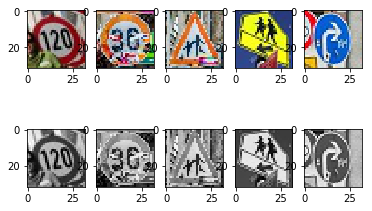

In [11]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg

n_images = 5
images = [mpimg.imread("realtest/{}.jpg".format(i+1)) for i in range(0, n_images)]
images_norm = [preprocess(img) for img in images]

for i, img in enumerate(images):
    plt.subplot(2, n_images, i+1); plt.imshow(img)
    plt.subplot(2, n_images, n_images+i+1); plt.imshow(images_norm[i].squeeze(), cmap='gray')

### Predict the Sign Type for Each Image

In [12]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
prediction = tf.argmax(logits, 1)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    result = sess.run(prediction, feed_dict={x: images_norm, keep_prob: 1})
    for p in result:
        print(signnames[p])

End of speed limit (80km/h)
Speed limit (30km/h)
Children crossing
No entry
Wild animals crossing


### Analyze Performance

In [13]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
expect = [8, 1, 28, 28, 33]
print(sum(expect == result) / n_images)

0.4


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [14]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
top_k = tf.nn.top_k(tf.nn.softmax(logits), k=5)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    values, indices = sess.run(top_k, feed_dict={x: images_norm, keep_prob: 1})
    for value, index in zip(values, indices):
        for v, i in zip(value, index):
            print("{:.2f}\t{}".format(v, signnames[i]))
        print()

0.23	End of speed limit (80km/h)
0.17	End of no passing by vehicles over 3.5 metric tons
0.15	Speed limit (30km/h)
0.10	Roundabout mandatory
0.09	Right-of-way at the next intersection

1.00	Speed limit (30km/h)
0.00	Speed limit (20km/h)
0.00	Speed limit (80km/h)
0.00	End of speed limit (80km/h)
0.00	Speed limit (70km/h)

0.99	Children crossing
0.00	Turn left ahead
0.00	End of no passing
0.00	End of all speed and passing limits
0.00	Ahead only

0.90	No entry
0.10	Stop
0.00	Speed limit (20km/h)
0.00	Traffic signals
0.00	Speed limit (30km/h)

0.22	Wild animals crossing
0.14	Speed limit (60km/h)
0.13	Road work
0.09	Speed limit (30km/h)
0.07	Double curve



### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 